In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [2]:
experiment_series ="20250509"
precipitation_setting = "Regen"
decay_setting = "decay"

memilio_id = 99

In [3]:
# Load the data
result_path = f"../../preprocessing/preprocessed_data/{experiment_series}/"

df = pd.read_csv(f"{result_path}/substances/{decay_setting}_{precipitation_setting}_{memilio_id}_output.csv")
df = df.loc[df.simulation_id == memilio_id].drop(columns=["simulation_id"])

df_measurements = pd.read_csv(f"{result_path}/../concentration_measurements.csv")
df_measurements.Location = df_measurements.Location.replace({'Langrieder \nBach': "Am Langwieder Bach",
                                  'Gräfelfinger Str. \n/Waldwiesenstr.': "Gräfelfinger Str.",
                                  "Schmidbartlanger ": "Schmidbartlanger", 
                                  "Savitsstr.": "Savitstr.", 
                                  "Gyßling Becken": "Gyßlinger Becken"})

df_measurements["Below_threshold"] = False
df_measurements.loc[df_measurements.Value=="<75", "Below_threshold"] = True
df_measurements.loc[df_measurements.Value=="<75", "Value"] = 75/2
df_measurements.Value = df_measurements.Value.astype(float)
df_measurements.Date = pd.to_datetime(df_measurements.Date)

In [4]:
df["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df["time_in_minutes"], unit="min")

/tmp/ipykernel_26347/251411132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


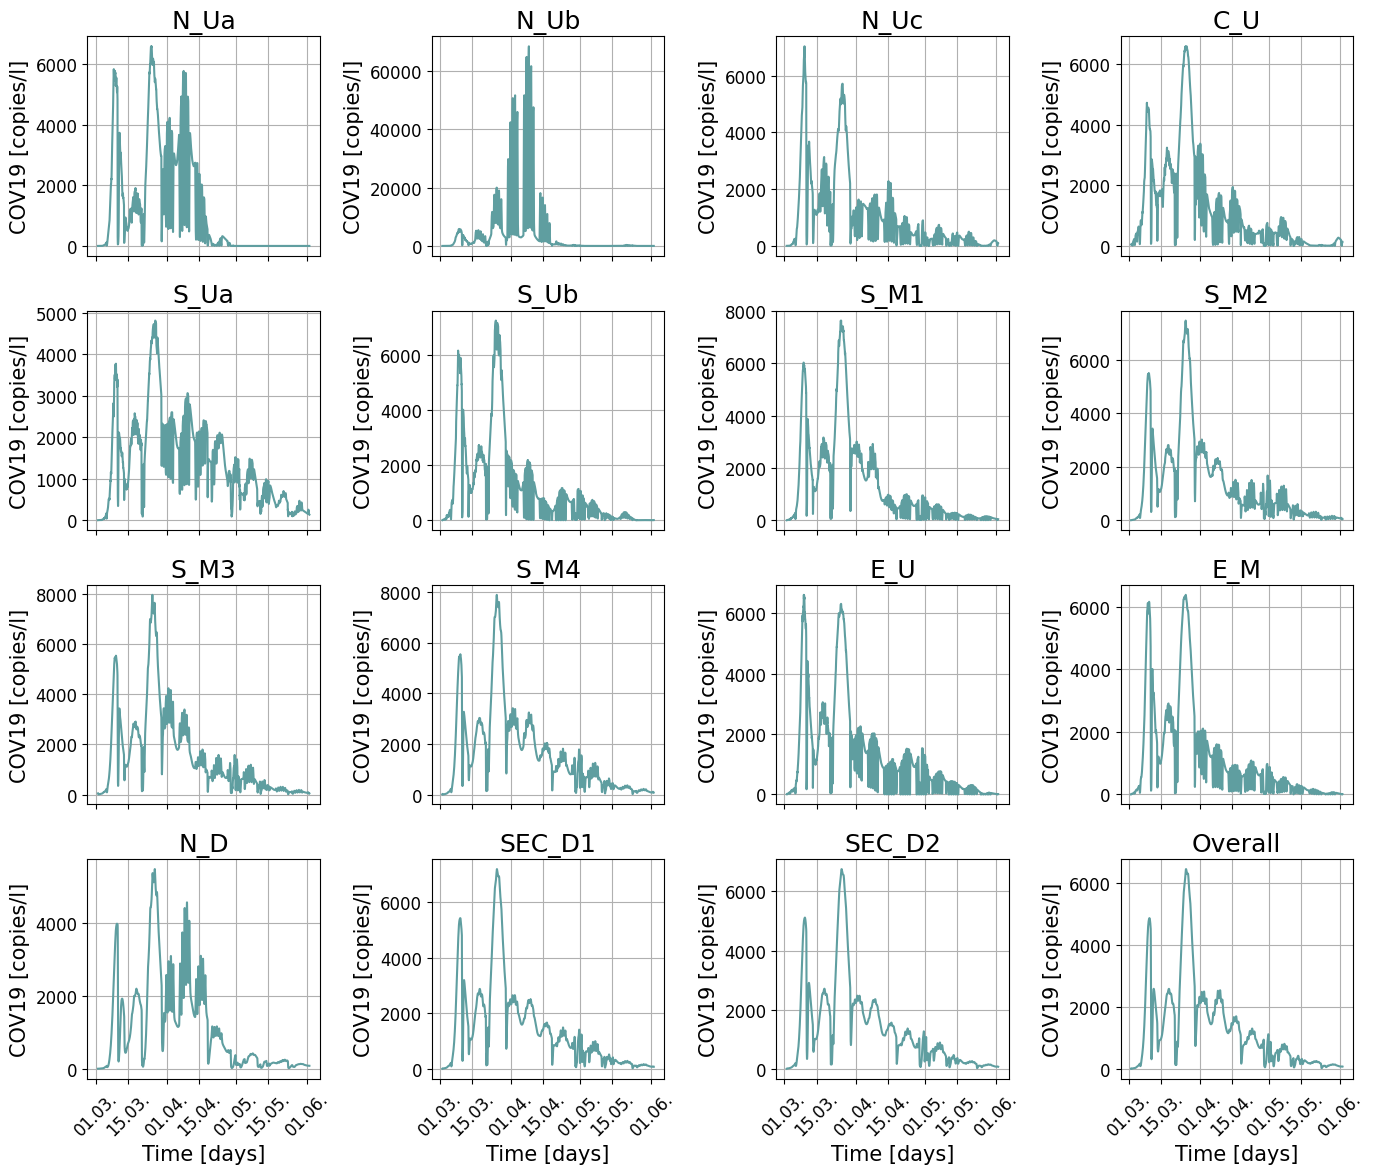

In [5]:
# Filter data
covid_df = df[(df["variable"] == "COV19") & (df["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = manhole_names.values()

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex=True)
axes = axes.flatten()


for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color="cadetblue")

    ax.scatter(measurements.loc[measurements.Below_threshold,["Date"]], measurements.loc[measurements.Below_threshold,"Value"], color="grey", zorder=10)
    ax.scatter(measurements.loc[~measurements.Below_threshold,["Date"]], measurements.loc[~measurements.Below_threshold,"Value"], color="goldenrod", zorder=10)

    ax.set_title(location)
    ax.set_ylabel("COV19 [copies/l]")

# Set x-labels for bottom row only
for ax in axes[-4:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.show()


/tmp/ipykernel_85332/1937018818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


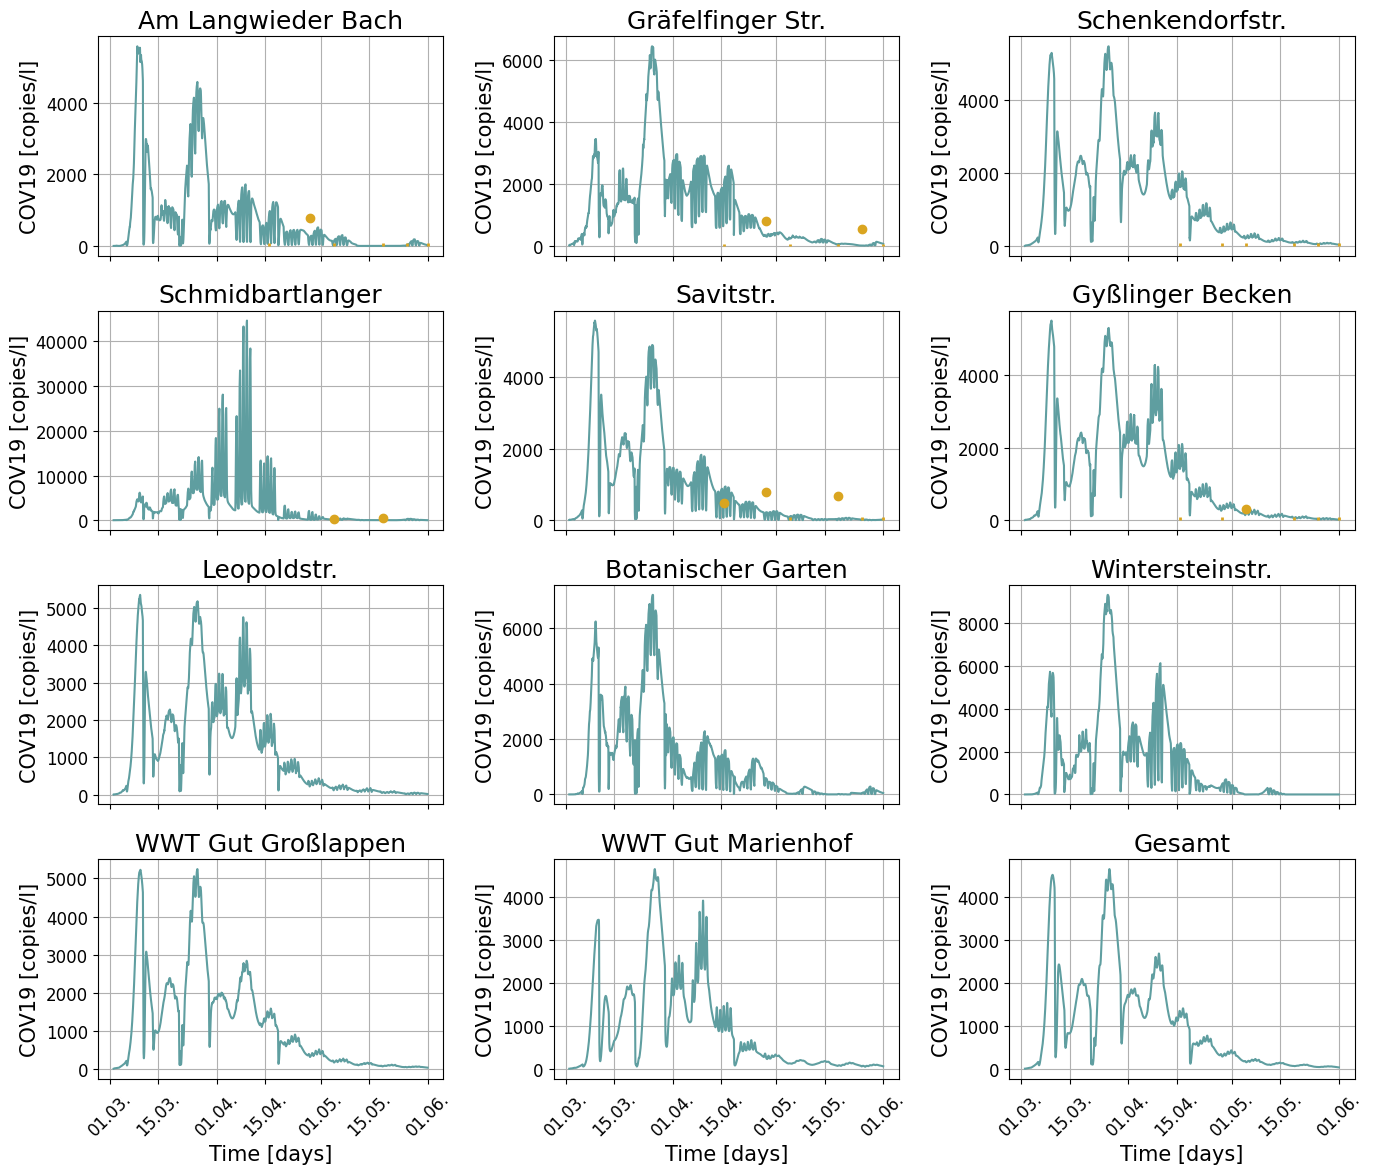

In [17]:
# Filter data
covid_df = df[(df["variable"] == "COV19") & (df["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = list(manhole_names.values())

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for i, location in enumerate(locations_sorted, start=0):    
    ax = axes[i]
    ax.grid(True)

    group = covid_df[covid_df["location"] == location]
    measurements = df_measurements[df_measurements["Location"] == location]
    ax.plot(group["Date"], group["value"], color="cadetblue")

    # Draw vertical lines for Below_threshold measurements
    below_thresh_dates = measurements.loc[measurements.Below_threshold, "Date"]
    for date in below_thresh_dates:
        ax.vlines(date, ymin=0, ymax=75, color="goldenrod", linewidth=2)

    # Keep goldenrod scatter for non-below-threshold points
    ax.scatter(measurements.loc[~measurements.Below_threshold, "Date"],
               measurements.loc[~measurements.Below_threshold, "Value"],
               color="goldenrod", zorder=10)

    ax.set_title(location)
    ax.set_ylabel("COV19 [copies/l]")
    
# Set x-labels for bottom row only
for ax in axes[-3:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.show()

/tmp/ipykernel_76206/3708709711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["location"] = covid_df["manhole"].map(manhole_names)


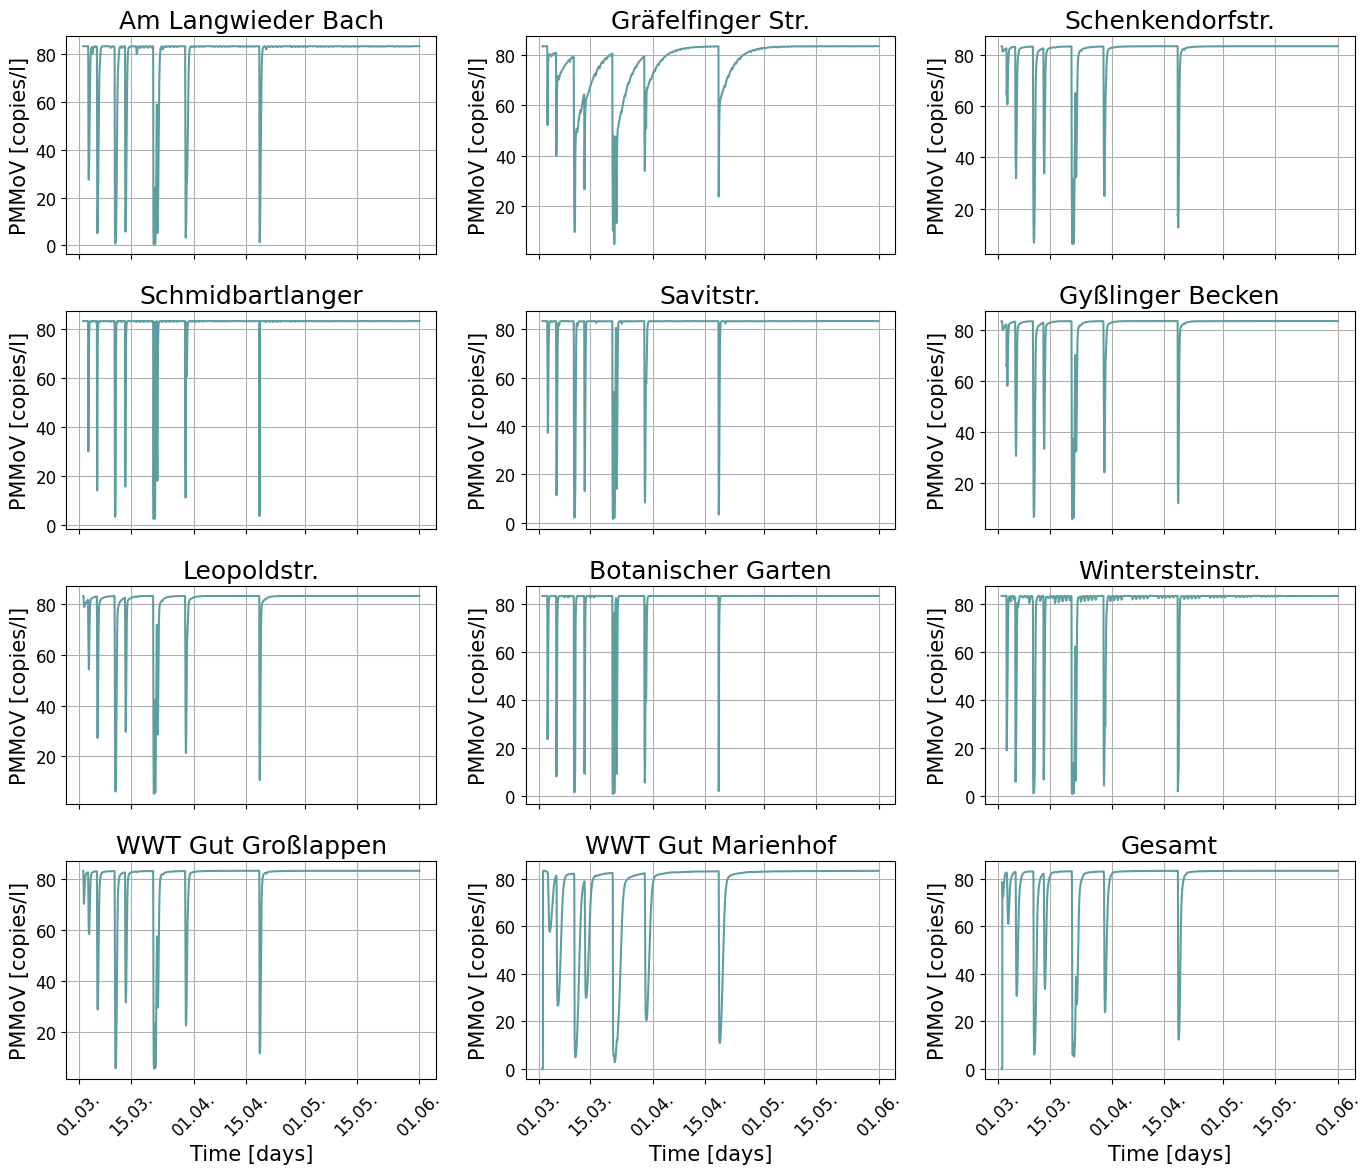

In [11]:
# Filter data
covid_df = df[(df["variable"] == "PMMoV") & (df["manhole"].isin(manhole_names.keys()))]
covid_df["location"] = covid_df["manhole"].map(manhole_names)

# Sort locations for consistency
locations_sorted = list(manhole_names.values())

# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for i, location in enumerate(locations_sorted, start=0):
    ax = axes[i]
    group = covid_df[covid_df["location"] == location]
    ax.plot(group["Date"], group["value"], color="cadetblue")
    ax.set_title(location)
    ax.set_ylabel("PMMoV [copies/l]")
    ax.grid(True)

# Set x-labels for bottom row only
for ax in axes[-3:]:
    ax.set_xlabel("Time [days]")
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m."))  # Format without year

# Add overall title
plt.tight_layout()
plt.show()